# Climate Analysis of Hawaii

Performing climatic analysis of Hawaii based on the temperature recorded on different stations


# Dependencies

In [67]:
# Python SQL toolkit and Object Relational Mapper

# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.sql import label
from flask import jsonify

# Reflect Tables into SQLAlchemy ORM

In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Climate Analysis

In [8]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
data_measurement = pd.read_sql("SELECT * FROM measurement", engine.connect())
data_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [13]:
data_station = pd.read_sql("SELECT * FROM station", engine.connect())
data_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [14]:
data_station['name'].value_counts()

WAIMANALO EXPERIMENTAL FARM, HI US        1
UPPER WAHIAWA 874.3, HI US                1
PEARL CITY, HI US                         1
KUALOA RANCH HEADQUARTERS 886.9, HI US    1
WAIHEE 837.5, HI US                       1
WAIKIKI 717.2, HI US                      1
KANEOHE 838.1, HI US                      1
HONOLULU OBSERVATORY 702.2, HI US         1
MANOA LYON ARBO 785.2, HI US              1
Name: name, dtype: int64

In [15]:
data_station.count()

id           9
station      9
name         9
latitude     9
longitude    9
elevation    9
dtype: int64

In [16]:
data_measurement['date'].value_counts()

2013-10-18    9
2012-01-17    9
2010-05-03    9
2010-11-12    9
2013-02-14    9
2010-08-23    9
2013-04-08    9
2011-04-12    9
2010-10-26    9
2010-12-06    9
2010-09-03    9
2010-09-23    9
2011-04-26    9
2011-02-01    9
2012-01-19    9
2011-03-30    9
2010-10-20    9
2010-11-22    9
2011-06-14    9
2010-11-05    9
2011-01-07    9
2010-10-29    9
2012-11-27    9
2011-04-18    9
2015-10-20    9
2010-08-19    9
2012-02-09    9
2011-01-25    9
2011-01-18    9
2011-03-08    9
             ..
2014-09-06    4
2012-08-18    4
2017-05-19    4
2017-08-01    4
2014-08-23    4
2016-03-13    4
2013-10-27    4
2010-02-27    4
2017-03-05    4
2017-08-10    4
2017-07-04    4
2017-04-23    4
2017-04-08    4
2017-08-03    4
2017-08-21    4
2016-11-19    4
2017-08-04    4
2017-08-17    4
2015-08-09    4
2017-08-07    4
2016-06-04    4
2017-02-19    4
2015-07-05    3
2017-08-22    3
2017-08-20    3
2017-08-12    3
2017-08-05    3
2017-08-09    3
2015-07-03    3
2015-07-04    3
Name: date, Length: 2792

In [17]:
data_measurement.count()

id         19550
station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64

In [18]:
data_measurement.isna().sum()

id            0
station       0
date          0
prcp       1447
tobs          0
dtype: int64

In [19]:
data_station.isna().sum()

id           0
station      0
name         0
latitude     0
longitude    0
elevation    0
dtype: int64

In [20]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [21]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [22]:
#Last Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Query Analysis

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_filter = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).statement

df_prcp = pd.read_sql_query(date_filter, session.bind)
df_prcp.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [24]:
df_prcp.isna().sum()

date      0
prcp    208
dtype: int64

In [25]:
# Removing NaN
df_prcp_dropped = df_prcp.dropna()
df_prcp_dropped.count()

date    2015
prcp    2015
dtype: int64

In [26]:
df_prcp_dropped.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15


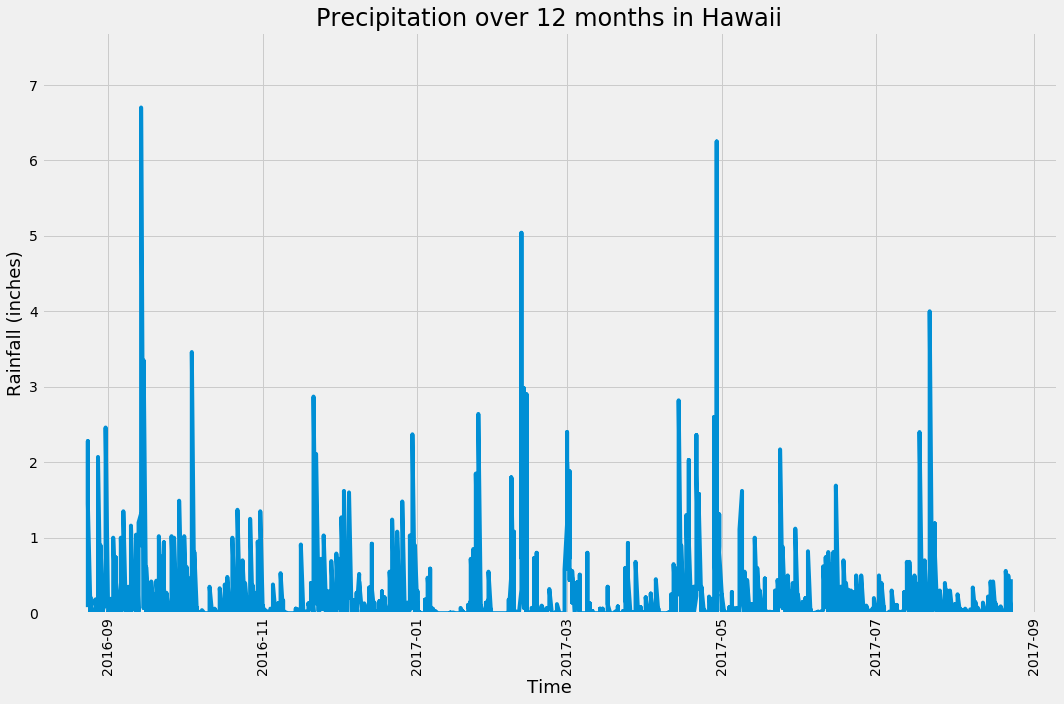

<Figure size 432x288 with 0 Axes>

In [141]:
# Use Pandas Plotting with Matplotlib to plot the data
# df_prcp_dropped['date']  = pd.to_datetime(df_prcp_dropped['date'])
# plt.plot(df_prcp_dropped['date'], df_prcp_dropped['prcp'])
# df_prcp_dropped.plot(kind="line",linewidth=4,figsize=(15,10))
plt.figure(figsize=(15,10))
plt.plot('date','prcp',data=df_prcp_dropped, linewidth=4)
plt.style.use('fivethirtyeight')
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Rainfall (inches)", fontsize = 18)
plt.title("Precipitation over 12 months in Hawaii", fontsize = 24)
plt.ylim(0, max(df_prcp_dropped['prcp']+1))
plt.xticks(rotation='90')
plt.tight_layout()
plt.show()

# Saving visualization as an image.
plt.savefig("Precipitation_year.png")

In [28]:
df_prcp_dropped.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
print(len(df_prcp_dropped[df_prcp_dropped['prcp'] != 0]))
print(len(df_prcp_dropped[df_prcp_dropped['prcp'] != 0].dropna()))

1142
1142


In [30]:
round(df_prcp_dropped[df_prcp_dropped['prcp'] != 0].mean(),2)

prcp    0.31
dtype: float64

In [31]:
df_prcp_dropped['prcp'].min()

0.0

In [32]:
no_rain_count_c = df_prcp_dropped.groupby('date').sum()['prcp']
no_rain_count = no_rain_count_c[no_rain_count_c == 0].count()
no_rain_count

48

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_min = df_prcp_dropped['prcp'].min()
rain_max = df_prcp_dropped['prcp'].max()
total = df_prcp_dropped['prcp'].sum()
average = round(df_prcp_dropped['prcp'].mean(),2)
average_if_rain = round(df_prcp_dropped[df_prcp_dropped['prcp'] != 0].mean(), 2)
#no_rain_count = df_prcp_dropped[df_prcp_dropped['prcp'] == 0]['prcp'].count()
rainy_days = 365 - no_rain_count
responses_dict = {'Rainy Days': rainy_days, 'Number of Days with No Rain': no_rain_count,'Highest Rainfall Day': rain_max, 'Average Rainfall Per Day': average, 'Average Rain per Rainstorm': average_if_rain, 'Total Rainfall': total}
summary_df = pd.DataFrame(responses_dict)
summary_df.rename(index={"prcp": "Precipitation"}, inplace=True)
summary_df.to_csv('rainfall_summary.csv')

summary_df

,Rainy Days,Number of Days with No Rain,Highest Rainfall Day,Average Rainfall Per Day,Average Rain per Rainstorm,Total Rainfall
Precipitation,317,48,6.7,0.18,0.31,355.57


In [34]:
# Design a query to show how many stations are available in this dataset?
station_boolean = session.query(Measurement.station).distinct().count()== session.query(Station.station).distinct().count()
if station_boolean:
    num_station = session.query(Measurement.station).distinct().count()
    print(f'The number of stations = {num_station}')
else:
    print('your database is not NSYNC')

The number of stations = 9


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
desc_observations = engine.execute('select station, count(station) from measurement group by station order by count(station) desc').fetchall()

busiest = desc_observations[0][0]    
print("The busiest Station was",busiest,"with",desc_observations[0][1],"weather observations.")
print("----------------------------------------------------------------------------------------")
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in desc_observations:
    print("Station",station,"had",count, "weather observations.")

The busiest Station was USC00519281 with 2772 weather observations.
----------------------------------------------------------------------------------------
Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp_min, temp_max, temp_avg = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station==busiest).all()[0]

temp_avg_r = round(temp_avg,1)

print (f"The lowest temperature observed is {temp_min}. \nThe highest temperature observed is {temp_max}. \nThe average temperature observed is {temp_avg_r}.")


The lowest temperature observed is 54.0. 
The highest temperature observed is 85.0. 
The average temperature observed is 71.7.


The highest number of observations come from WAIHEE 837.5, HI US


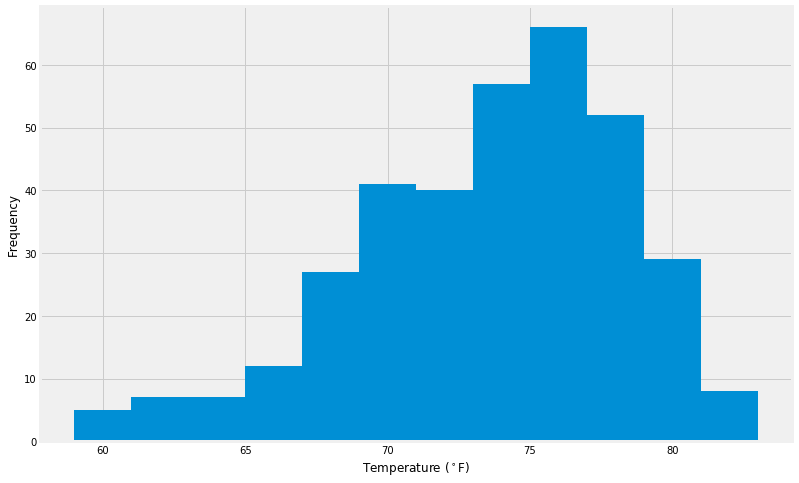

In [44]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id = desc_observations[0][0]
station_name = session.query(Station.name).filter(Station.station==desc_observations[0][0]).all()
print(f'The highest number of observations come from {station_name[0][0]}')

tobs_query = session.query(Measurement.tobs, Measurement.station).\
filter(Measurement.date >'2016-08-23', Measurement.date <='2017-08-23').\
filter(Measurement.station==station_id).\
order_by(Measurement.date).statement 

tobs_df = pd.read_sql(tobs_query, engine).dropna()
tobs_df.head(5)

x = tobs_df['tobs']
plt.figure(figsize=(12,8))
plt.hist(x, bins=12)
plt.xlabel(r'Temperature ($^\circ$F)')
plt.ylabel('Frequency')
plt.savefig("Observ_Dist.png")
plt.show()

# Temperature Analysis

In [79]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates with a graph.

# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# # function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

def calc_temps(startdate, enddate):
    start = startdate - timedelta(days=365)
    end = enddate - timedelta(days=365)
    
    temp_vac = session.query(label('max_temp',func.max(Measurement.tobs)),\
                                     label('min_temp',func.min(Measurement.tobs)),\
                                     label('avg_temp',func.avg(Measurement.tobs))).\
                                     filter(Measurement.date >= start).\
                                     filter(Measurement.date <= end)
    
    Max_temp = temp_vac[0].max_temp
    Min_temp = temp_vac[0].min_temp
    Avg_temp = temp_vac[0].avg_temp
    
    yerror = Max_temp - Min_temp
    
    barvalue = [Avg_temp]
    xvals = range(len(barvalue))
    plt.rcParams.update({'font.size': 12})
    
    fig,ax = plt.subplots(figsize=(5,12))
    ax.bar(xvals, barvalue, yerr=yerror, color='salmon',alpha=0.5)
    ax.set_xticks([1]) 
    plt.xlabel("Vacation Time Period")
    plt.ylabel("Temperature")
    plt.title("Trip Average Temperature")
    plt.tight_layout()
    plt.savefig("trip_avg.png")
    
    plt.show()

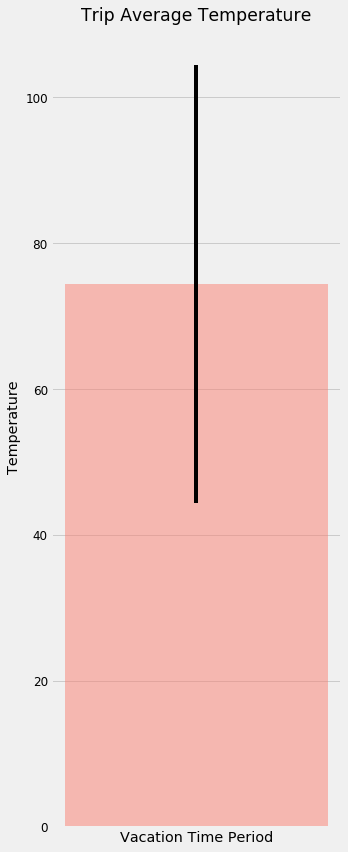

In [80]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps(dt(2016,8,23), dt(2017,8,24))

In [110]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rainfall(startdate,enddate):
    start = startdate - timedelta(days=365)
    end = enddate - timedelta(days=365)
    
    rainfall_per_station = session.query(Station.name,Station.station,Station.latitude,Station.longitude,label('avg_rainfall',func.avg(Measurement.prcp))).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= start).\
                    filter(Measurement.date <= end).\
                    group_by(Station.name,Station.station).order_by(func.avg(Measurement.prcp))
    
    df = pd.DataFrame(query_to_dict(rainfall_per_station))
       
    return df


def query_to_dict(res):
    res_dict = []
    for rec in res:
        res_dict.append(rec)
    
    return res_dict

In [108]:
rainfall(dt(2016,8,23), dt(2017,8,24))

,name,station,latitude,longitude,avg_rainfall
0,"UPPER WAHIAWA 874.3, HI US",USC00518838,21.49920,-158.01110,0.000000
1,"WAIKIKI 717.2, HI US",USC00519397,21.27160,-157.81680,0.064044
2,"PEARL CITY, HI US",USC00517948,21.39340,-157.97510,0.126667
3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,21.52130,-157.83740,0.140687
4,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,21.31520,-157.99920,0.141071
5,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,21.33556,-157.71139,0.171383
6,"KANEOHE 838.1, HI US",USC00513117,21.42340,-157.80150,0.204917
7,"WAIHEE 837.5, HI US",USC00519281,21.45167,-157.84889,0.285562
8,"MANOA LYON ARBO 785.2, HI US",USC00516128,21.33310,-157.80250,0.560129


In [118]:
# def daily_normals(date):
#     """Daily Normals.
    
#     Args:
#         date (str): A date string in the format '%m-%d'
        
#     Returns:
#         A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#     """
    
#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
# daily_normals("01-01")

def daily_normals(startdate, enddate):
    df = pd.DataFrame()
    session = Session(engine)
    compstart = dt.strptime(startdate,"%m-%d") - timedelta(days=365)
    compend = dt.strptime(enddate,"%m-%d") - timedelta(days=365)
    
    compstart = compstart.replace(year = 2017)
    compend = compend.replace(year = 2017)
    
    print(f"compstart-{compstart} : compend-{compend}")
    
    daily_temperatures = session.query(Measurement.date,label('tmax',func.max(Measurement.tobs)),\
                                      label('tmin',func.min(Measurement.tobs)),
                                      label('tavg',func.avg(Measurement.tobs)),).\
                                      filter(Measurement.date >= compstart).\
                                      filter(Measurement.date <= compend).\
                                      group_by(Measurement.date).order_by(Measurement.date)
    
    df = pd.DataFrame(query_to_dict(daily_temperatures))
    
    print(f"dataframe columns - {df.columns}")
    
    if('date' in df.columns):
        df = df.set_index('date')
    
    return df

In [119]:
daily_normals('01-01','01-02')

compstart-2017-01-01 00:00:00 : compend-2017-01-02 00:00:00
dataframe columns - Index(['date', 'tmax', 'tmin', 'tavg'], dtype='object')


,tmax,tmin,tavg
date,,,
2017-01-02,74.0,66.0,69.2


In [123]:
def show_daily_normals():
    daily_normals_df = daily_normals('01-01','01-10')
    daily_normals_df.plot(kind='area',stacked=False,figsize=(15,10),alpha=0.5,cmap = plt.cm.get_cmap('Paired'))

    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title(f"Trip - Daily Normals")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig("trip_daily_normals.png")

    plt.show()

compstart-2017-01-01 00:00:00 : compend-2017-01-10 00:00:00
dataframe columns - Index(['date', 'tmax', 'tmin', 'tavg'], dtype='object')


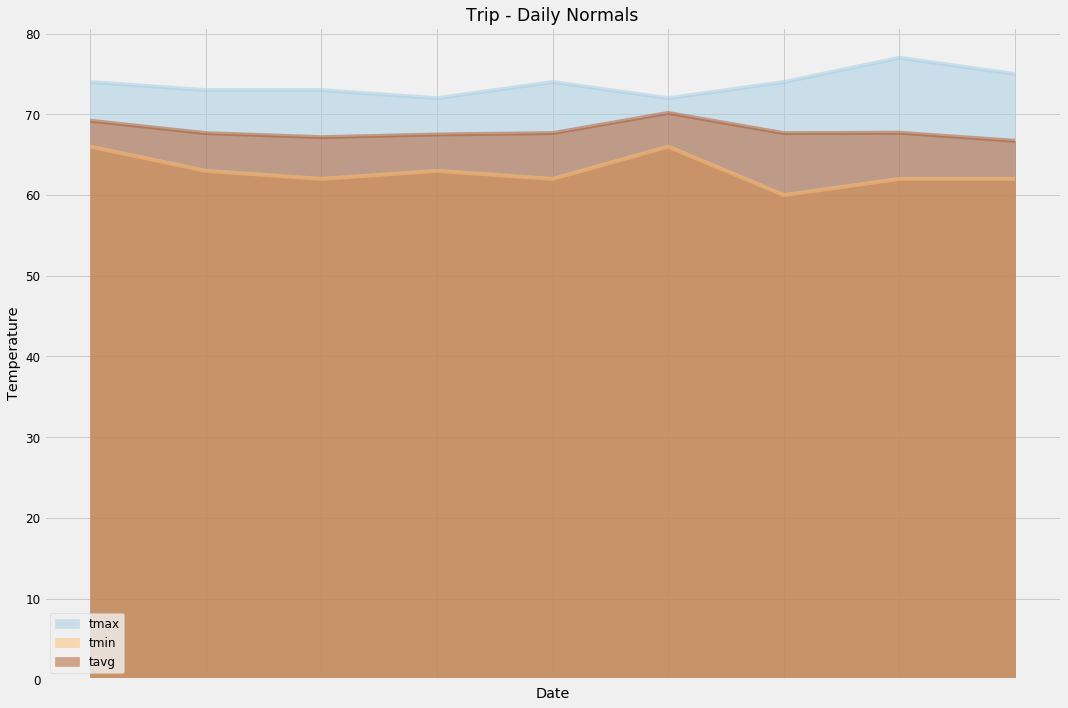

In [124]:
show_daily_normals()

In [130]:
def prcp():

    # select all the data and precipitation 
    results = session.query(Measurement.date, Measurement.prcp).\
        order_by(Measurement.date).all()

    # convert results to dictionary and return json file
    prcp_dict = {}

    for date, prcp in results:
        prcp_dict[date] = prcp
        
    return prcp_dict

In [129]:
def stations():
    # Station column names
    name_list = []
    inspector = inspect(engine)
    columns = inspector.get_columns('station')
    for column in columns:
        name_list.append(column["name"])
    name_list.remove('id')

    station_dict = {}
    for result in session.query(Station):
        result_dict = result.__dict__
        result_dict_clean = {key: result_dict[key] for key in name_list }
        station_dict['id_'+str(result_dict['id'])] = result_dict_clean
    
    return station_dict

In [128]:
def get_tobs():
    current_time = datetime.now()

    past_year = current_time - timedelta(days=365)
    

    temp = session.query(Measurements.date,Measurements.tobs).\
                        filter(Measurements.date > past_year).all()

    station_measures = []
    for measure in temp:
        station_measures.append(measure._asdict())

    station_measures_df = pd.DataFrame.from_records(station_measures)

    station_measures_df = station_measures_df.set_index('date')


    return station_measures_df